In [ ]:

import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score,roc_auc_score
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features =dataset.data
y_labels=dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_labels

cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X_features,y_labels,test_size=0.3, random_state=126)

In [ ]:
xgb_clt= XGBClassifier(n_estimators=400,learning_rate=0.3,max_depth=3)
xgb_clt.fit(X_train,y_train)
pred= xgb_clt.predict(X_test)

pred_proba=xgb_clt.predict_proba(X_test) #predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1 사이의 값으로 돌려준다.


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def get_clt_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  F1=f1_score(y_test,pred)
  AUC=roc_auc_score(y_test,pred)
  lr_probs=pred_proba[:,1]
  ns_probs =[0 for _ in range(len(y_test))] # y_test의 개수만큼 0의 것을 만들어줌
  ns_fpr,ns_tpr, _ =roc_curve(y_test,ns_probs)
  lr_fpr,lr_tpr, _ =roc_curve(y_test,lr_probs)
  
  plt.plot(ns_fpr,ns_tpr,linestyle='--',label='No Skill')
  plt.plot(lr_fpr,lr_tpr,marker='.' ,label='XGBOOST')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

  print(f'오차행렬 \n {confusion}',)
  print(f'정확도 \n {accuracy}')
  print(f'정밀도 \n {precision}')
  print(f'재현율 \n {recall}')
  print(f'f1_score \n {F1}')
  print(f'AUC \n {AUC}')

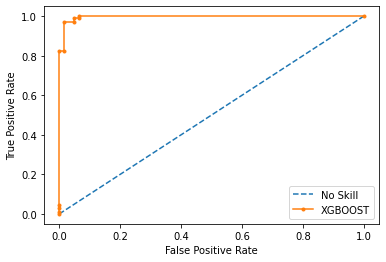

오차행렬 
 [[ 57   5]
 [  0 109]]
정확도 
 0.9707602339181286
정밀도 
 0.956140350877193
재현율 
 1.0
f1_score 
 0.9775784753363228
AUC 
 0.9596774193548386


In [ ]:
get_clt_eval(y_test,pred)

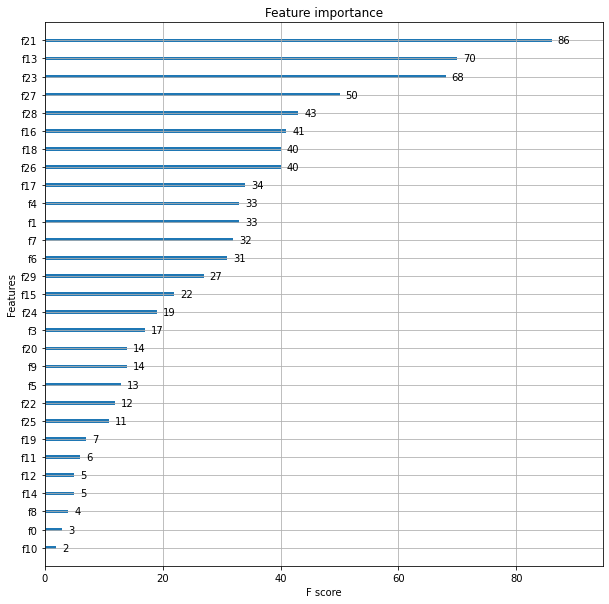

In [ ]:
fig, ax= plt.subplots (figsize=(10,10))

plot_importance(xgb_clt,ax=ax)

In [ ]:
xgb_clt= XGBClassifier(n_estimators=400,learning_rate=0.3,max_depth=3,verbose=True)

xgb_clt.fit(X_train,y_train,early_stopping_rounds=120,eval_metric='logloss',eval_set=[(X_test,y_test)]) #fit안에 early하면 더이상 학습 안될때 하게 됨 # 100번동안 변화없으면 끝냄

pred= xgb_clt.predict(X_test)   
ns_probs =[0 for _ in range(len(y_test))] # y_test의 개수만큼 0의 것을 만들어줌
ns_fpr,ns_tpr, _ =roc_curve(y_test,ns_probs)         

[0]	validation_0-logloss:0.483248
Will train until validation_0-logloss hasn't improved in 120 rounds.
[1]	validation_0-logloss:0.372145
[2]	validation_0-logloss:0.298432
[3]	validation_0-logloss:0.24624
[4]	validation_0-logloss:0.211619
[5]	validation_0-logloss:0.18107
[6]	validation_0-logloss:0.165015
[7]	validation_0-logloss:0.154588
[8]	validation_0-logloss:0.138448
[9]	validation_0-logloss:0.123674
[10]	validation_0-logloss:0.115068
[11]	validation_0-logloss:0.1073
[12]	validation_0-logloss:0.106355
[13]	validation_0-logloss:0.100278
[14]	validation_0-logloss:0.099321
[15]	validation_0-logloss:0.101317
[16]	validation_0-logloss:0.10369
[17]	validation_0-logloss:0.102141
[18]	validation_0-logloss:0.1013
[19]	validation_0-logloss:0.102265
[20]	validation_0-logloss:0.100523
[21]	validation_0-logloss:0.095553
[22]	validation_0-logloss:0.096586
[23]	validation_0-logloss:0.098782
[24]	validation_0-logloss:0.098569
[25]	validation_0-logloss:0.095506
[26]	validation_0-logloss:0.096996
[27

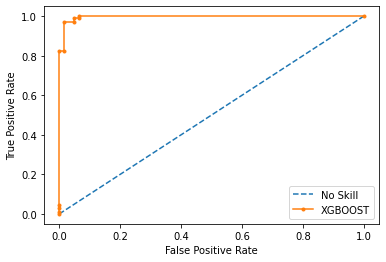

오차행렬 
 [[ 57   5]
 [  0 109]]
정확도 
 0.9707602339181286
정밀도 
 0.956140350877193
재현율 
 1.0
f1_score 
 0.9775784753363228
AUC 
 0.9596774193548386


In [ ]:
get_clt_eval(y_test,pred)

In [ ]:
xgb_clt= XGBClassifier(n_estimators=400,learning_rate=0.3,max_depth=3,verbose=True)

xgb_clt.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=[(X_test,y_test)]) #fit안에 early하면 더이상 학습 안될때 하게 됨 # 100번동안 변화없으면 끝냄

pred= xgb_clt.predict(X_test)   
ns_probs =[0 for _ in range(len(y_test))] # y_test의 개수만큼 0의 것을 만들어줌
ns_fpr,ns_tpr, _ =roc_curve(y_test,ns_probs)         

[0]	validation_0-logloss:0.483248
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.372145
[2]	validation_0-logloss:0.298432
[3]	validation_0-logloss:0.24624
[4]	validation_0-logloss:0.211619
[5]	validation_0-logloss:0.18107
[6]	validation_0-logloss:0.165015
[7]	validation_0-logloss:0.154588
[8]	validation_0-logloss:0.138448
[9]	validation_0-logloss:0.123674
[10]	validation_0-logloss:0.115068
[11]	validation_0-logloss:0.1073
[12]	validation_0-logloss:0.106355
[13]	validation_0-logloss:0.100278
[14]	validation_0-logloss:0.099321
[15]	validation_0-logloss:0.101317
[16]	validation_0-logloss:0.10369
[17]	validation_0-logloss:0.102141
[18]	validation_0-logloss:0.1013
[19]	validation_0-logloss:0.102265
[20]	validation_0-logloss:0.100523
[21]	validation_0-logloss:0.095553
[22]	validation_0-logloss:0.096586
[23]	validation_0-logloss:0.098782
[24]	validation_0-logloss:0.098569
[25]	validation_0-logloss:0.095506
[26]	validation_0-logloss:0.096996
[27